In [53]:
import numpy as np
import pandas as pd
import random
!ls

Activity 3                              Lecture 10.2 Pt.2.ipynb
Lecture 10.2 - Time Series Models.ipynb osptx.csv


In [3]:
df = pd.read_csv('osptx.csv')

In [4]:
from statsmodels.tsa.stattools import adfuller

def is_stationary(series_x): 
    """
    Input expected: Pandas series
    """
    series_x.plot(title=series_x.name)
    
    result = adfuller(series_x)
    # Access the contents of the results:
    print('ADF Statistic: %f' % result[0])
    print('p-value:        %f ' % result[1])
    print('Lags used:      %d' % result[2])
    print('Critical Values:')
    for key, value in result[4].items():
        print((key, value))
    

    p_value = result[1]
    if p_value <= 0.05: 
        return True 
    elif p_value > 0.05: 
        return False

<AxesSubplot:>

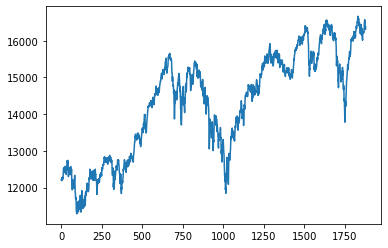

In [5]:
# plotting the price
df.Close.plot()

ADF Statistic: -1.556289
p-value:        0.505505 
Lags used:      1
Critical Values:
('1%', -3.4338349685861806)
('5%', -2.8630794170659684)
('10%', -2.5675895289750503)


False

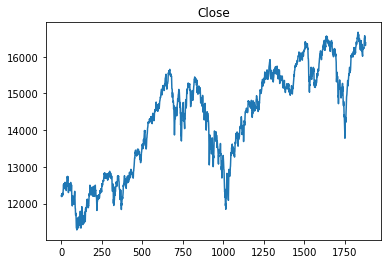

In [6]:
is_stationary(df.Close)

In [8]:
# making the data stationary
df['returns'] = df['Close'].pct_change()
df.dropna(inplace=True)

ADF Statistic: -20.886771
p-value:        0.000000 
Lags used:      4
Critical Values:
('1%', -3.433842413401391)
('5%', -2.8630827037453277)
('10%', -2.5675912790044446)


True

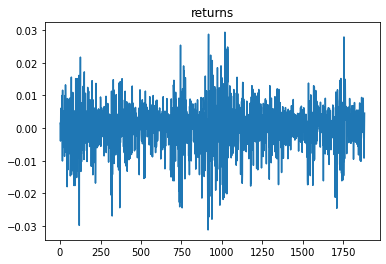

In [9]:
# testing for statioanlity
is_stationary(df['returns'])

In [28]:
from statsmodels.tsa.arima_model import ARMA

In [32]:
model = ARMA(df['returns'].values, order=(1,1))

In [30]:
# fitting the data
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.56387D+00    |proj g|=  9.07736D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      5      1     0     0   2.265D-05  -3.564D+00
  F =  -3.5638654039013895     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


In [40]:
forecast = results.forecast(steps=10)
forecast[0]
five_day_forecast = forecast[0]

array([0.0005331 , 0.00014296, 0.00018428, 0.0001799 , 0.00018036,
       0.00018032, 0.00018032, 0.00018032, 0.00018032, 0.00018032])

<AxesSubplot:>

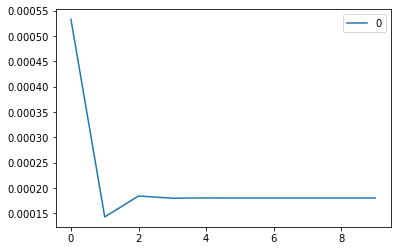

In [45]:
forecast_df = pd.DataFrame(forecast[0])
forecast_df.plot()

In [52]:
 # Summarize the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1880
Model:                     ARMA(1, 1)   Log Likelihood                6700.067
Method:                       css-mle   S.D. of innovations              0.007
Date:                Mon, 25 Apr 2022   AIC                         -13392.134
Time:                        20:19:17   BIC                         -13369.978
Sample:                             0   HQIC                        -13383.973
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.064      0.288      -0.000       0.001
ar.L1.y       -0.1059      0.278     -0.381      0.703      -0.650       0.439
ma.L1.y        0.1861      0.275      0.678      0.498      -0.352       0.724
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -9.4416           +0.0000j            9.4416            0.5000
MA.1           -5.3741           +0.0000j            5.3741            0.5000
-----------------------------------------------------------------------------
"""